#MOUNTING GOOGLE DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORTING LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#IMPORTING DATASET

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML/DLRG/DATASET /post-operative-data.csv')

#ANALYZING THE DATASET

In [5]:
print(data.size)
data.head(10)

810


,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,5,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


#VISUALIZING THE DATASET

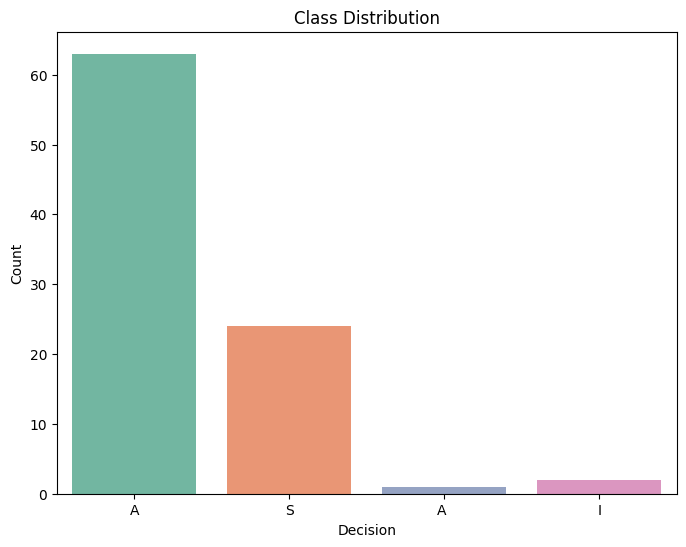

Class Distribution:
A     63
S     24
I      2
A      1
Name: decision ADM-DECS, dtype: int64


In [6]:
# Count the occurrences of each class in the target variable
class_counts = data['decision ADM-DECS'].value_counts()

# Plot a bar graph to visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='decision ADM-DECS', data=data, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

# Print the class counts
print("Class Distribution:")
print(class_counts)

#CONVERTING STRING DATA TO NUMERIC DATA

In [7]:
data['COMFORT'] = pd.to_numeric(data['COMFORT'], errors='coerce')

#HANDLING MISSING VALUES

In [8]:
median_values = data['COMFORT'].median()
data.fillna(median_values, inplace=True)

#ENCODING THE DATA

In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL']
label_encoder = LabelEncoder()

data_encoded = {}
for col in categorical_columns:
  data_encoded[col] = label_encoder.fit_transform(data[col])

In [10]:
data_encoded['COMFORT'] = data['COMFORT']
data_encoded['decision ADM-DECS'] = data['decision ADM-DECS']
data_encoded = pd.DataFrame(data_encoded)
#Display sample data
data_encoded.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,2,1,0,2,0,1,1,15.0,A
1,2,0,0,0,0,1,1,10.0,S
2,0,1,0,0,0,1,0,10.0,A
3,2,1,1,0,0,2,0,15.0,A
4,2,2,0,0,0,1,1,10.0,A


# SPLITTING DATA INTO FEATURES(X) AND TARGET LABELS(Y)

In [11]:
X=data_encoded.iloc[:,:-1].values
y=data_encoded.iloc[:,-1].values

#SPLITTING DATASET INTO TRAINING AND TESTING SETS

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#FEATURE SCALING

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#TRAINING OUR MODEL USING RANDOM FOREST


In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#GETTING ACCURACY SCORE

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


#CHECKING OUR MODEL

In [16]:
print(model.predict(sc.transform([[2,1,0,2,0,1,1,15.0]])))

['A']
